In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
FONT_SIZE = 15

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

import common
import tqdm
import numpy as np
import pandas as pd

In [97]:
max_n_past_intervals = 4
threshold = int(1e7)
log1p_threshold = np.log1p(threshold)
snapshot_interval = int(5e7)

In [98]:
fields = ['t', 'key', 'size']

In [112]:
df = pd.read_csv(f'{common.WEBCACHESIM_ROOT}/trace/w200m.tr', delimiter=' ',
                 names=fields, nrows=10000000, skiprows=100000000)

In [113]:
df_unique = df[['key', 'size']].drop_duplicates()

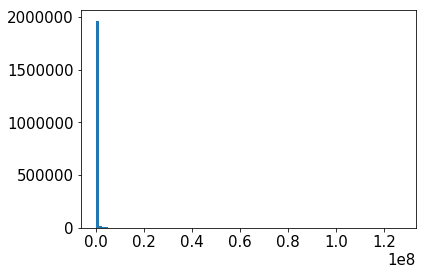

In [118]:
plt.hist(df_unique['size'], bins=100)
plt.show()

In [120]:
max(df_unique['size'][df_unique['size'] > 0.2e8])

126872743

In [114]:
df_unique['size'].sum() // int(1e9)

176

In [115]:
df_unique['size'].count()

1994252

In [111]:
df_unique['size'].sum() // int(1e9)

190

In [86]:
top_key = df.key.value_counts()

In [91]:
n = 10
n_col = 2

In [92]:
len(top_key)

2014944

In [93]:
sample_ids = np.logspace(0, np.log10(len(top_key)- n ), n, dtype=int) - 1

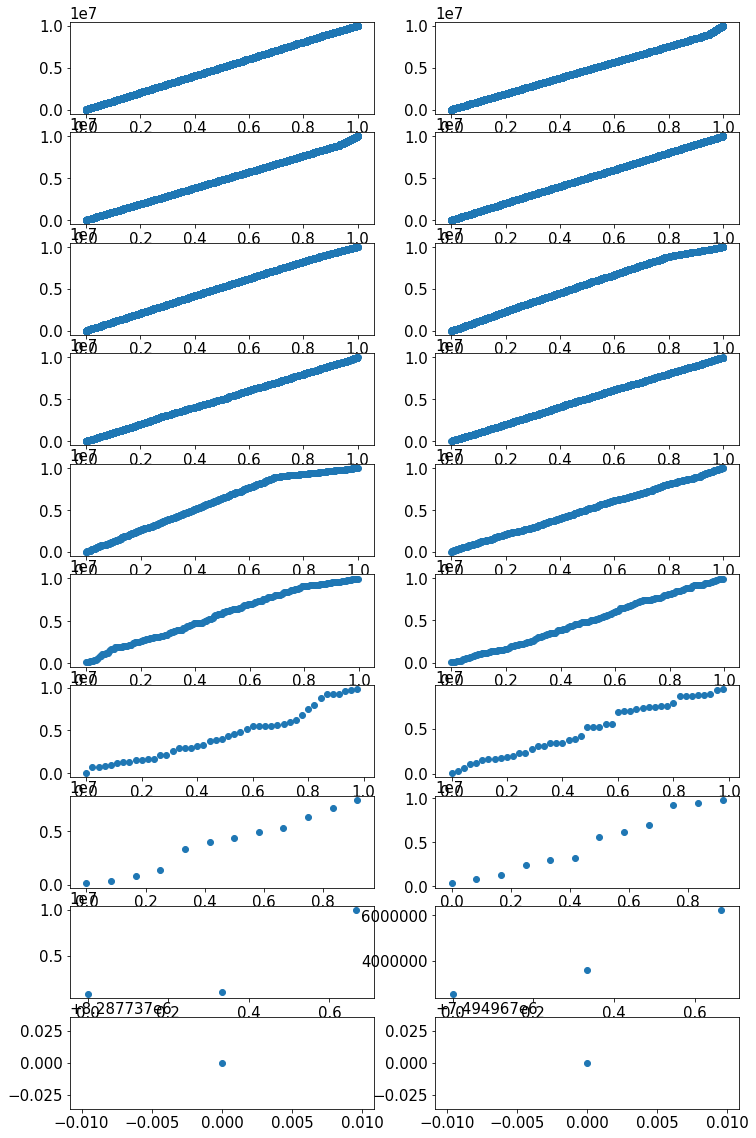

In [94]:
fig, axes = plt.subplots(figsize=(12, 2*n), ncols=n_col, nrows=n)
for i, base in enumerate(sample_ids):
    for j in range(n_col):
        requests_for_object = df[df.key == top_key.index[base+j]].reset_index(drop=True)
        axes[i][j].scatter(requests_for_object.index/(requests_for_object.index.max()+1), requests_for_object.t)

In [ ]:
requests_for_object = df[df.key == top_key.index[base+j]].reset_index(drop=True)
axes[i][j].scatter(requests_for_object.index/(requests_for_object.index.max()+1), requests_for_object.t)

In [27]:
requests_for_object = df[df.key == top_key.index[0]].reset_index(drop=True)

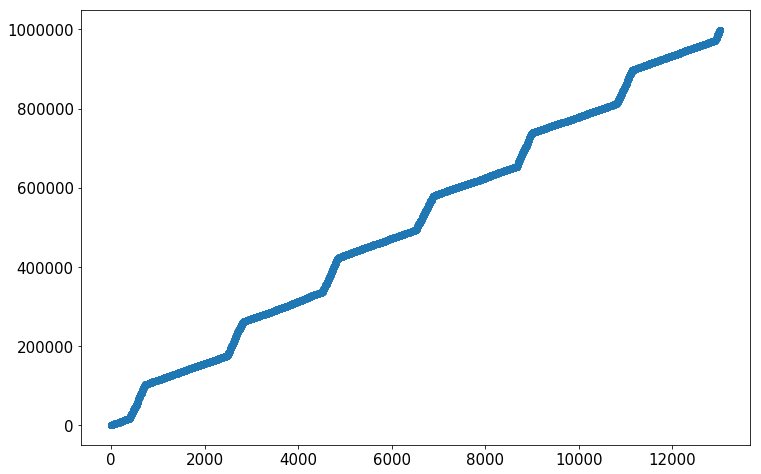

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(requests_for_object.index, requests_for_object.t)
# plt.xlim([0, 250])
plt.show()

In [40]:
requests_for_object = df[df.key == top_key.index[1]].reset_index(drop=True)

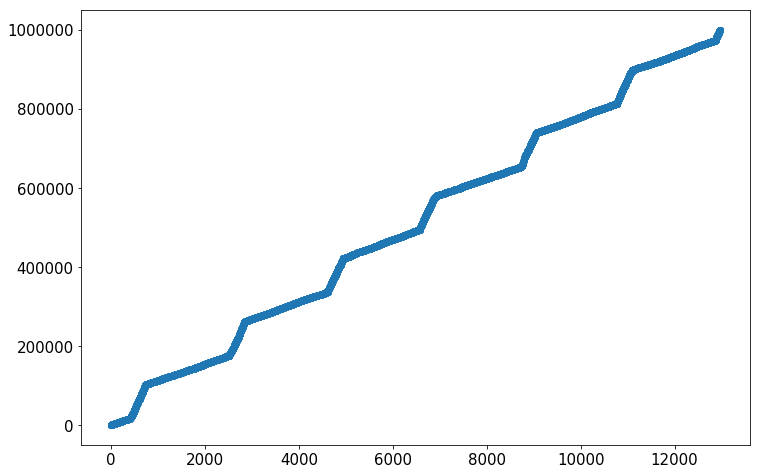

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(requests_for_object.index, requests_for_object.t)
# plt.xlim([0, 250])
plt.show()

In [42]:
requests_for_object = df[df.key == top_key.index[2]].reset_index(drop=True)

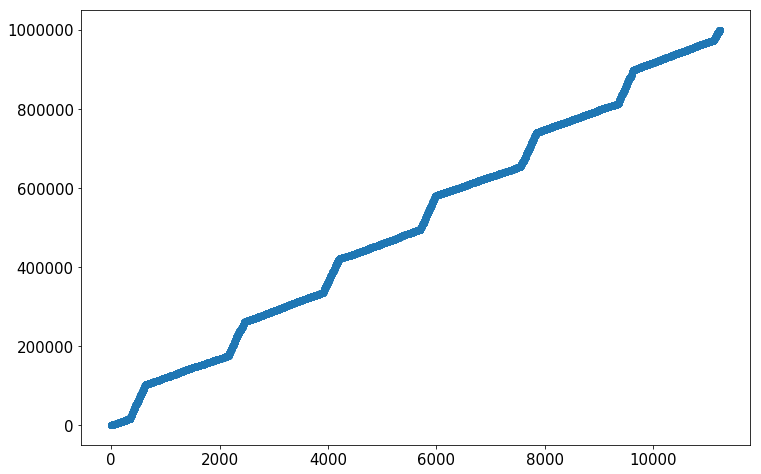

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(requests_for_object.index, requests_for_object.t)
# plt.xlim([0, 250])
plt.show()